[ 11.51180398   7.14878132 101.73957816 182.08120216]
608196.7602541952
Iteration 0: Best Cost = 608196.7602541952
Iteration 10: Best Cost = 29319.088602166597
Iteration 20: Best Cost = 8053.639824415931
Iteration 30: Best Cost = 6608.310789182929
Iteration 40: Best Cost = 6155.799128165636
Iteration 50: Best Cost = 5960.428893746929
Iteration 60: Best Cost = 5960.428893746929
Iteration 70: Best Cost = 5903.740883725768
Iteration 80: Best Cost = 5903.740883725768
Iteration 90: Best Cost = 5902.030896881496
Iteration 100: Best Cost = 5902.030896881496
Iteration 110: Best Cost = 5902.030896881496
Iteration 120: Best Cost = 5891.2882182968215
Iteration 130: Best Cost = 5887.887648557326
Iteration 140: Best Cost = 5886.716755444791
Best solution: [  0.7782288    0.38468525  40.32001242 200.        ]


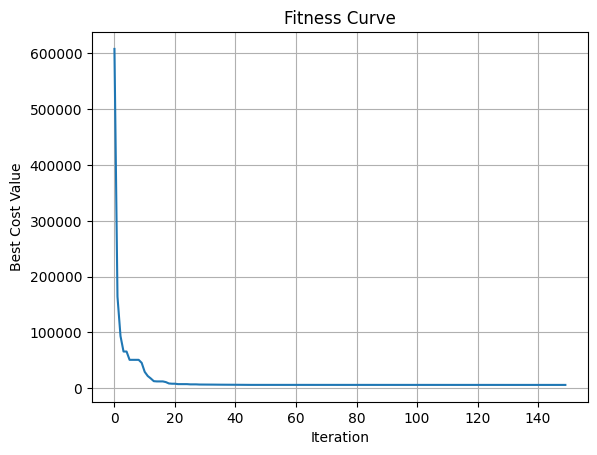

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of variables in the optimization problem
numberOfVariables = 4

# Define the minimum and maximum values for each variable
varmin = np.array([0, 0, 10, 10])
varmax = np.array([100, 100, 200, 200])

# Define the number of particles in the swarm
numberOfParticles = 100

# Define the number of iterations for the PSO algorithm
iterations = 150

# Define the inertia coefficient
inertia_weight = 0.8

# Define the cognitive (personal) coefficient
# hamon local
cognitive_coefficient = 1.5

# Define the social (global) coefficient
social_coefficient = 1.5

# Define a class to represent a particle in the swarm
class Particle:
    def __init__(self):
        self.position = np.random.uniform(varmin, varmax, numberOfVariables)
        self.velocity = np.random.uniform(-1, 1, numberOfVariables)
        self.best_position = np.copy(self.position)
        self.costValue = cost_function(self.position)
        self.best_costValue = self.costValue

# Define the objective function with constraints
def cost_function(x):
    constraints = np.array([
        -x[0] + 0.0193 * x[2],
        -x[1] + 0.00954 * x[2],
        -np.pi * x[2]**2 * x[3] - (4/3) * np.pi * x[2]**3 + 1296000,
        x[3] - 240,
        # inja hamon min va max dastane
        -x[0] + 0, -x[1] + 0, -x[2] + 10, -x[3] + 10,
        x[0] - 100, x[1] - 100, x[2] - 200, x[3] - 200
    ])
    penalty = 100000 * np.sum(np.maximum(constraints, 0))
    obj_value = (0.6224 * x[0] * x[2] * x[3] + 1.7781 * x[1] * x[2]**2 +
                 3.1661 * x[0]**2 * x[3] + 19.84 * x[0]**2 * x[2] + penalty)
    return obj_value

# Particle Swarm Optimization algorithm
def particle_swarm_optimization():
    swarm = [Particle() for _ in range(numberOfParticles)]
    global_best = min(swarm, key=lambda p: p.costValue)
    print(global_best)
    global_best_position = np.copy(global_best.position)
    print(global_best_position)
    global_best_costValue = global_best.costValue
    print(global_best_costValue)
    fitness_curve = []

    for iteration in range(iterations):
        for particle in swarm:  #inja mohasebe fitness engar
            particle.costValue = cost_function(particle.position)

            if particle.costValue < particle.best_costValue:
                particle.best_position = np.copy(particle.position)
                particle.best_costValue = particle.costValue

            if particle.costValue < global_best_costValue:
                global_best_position = np.copy(particle.position)
                global_best_costValue = particle.costValue
# inja hamon formul PSO
        for particle in swarm:
            particle.velocity = (inertia_weight * particle.velocity +
                                 cognitive_coefficient * np.random.rand(numberOfVariables) * (particle.best_position - particle.position) +
                                 social_coefficient * np.random.rand(numberOfVariables) * (global_best_position - particle.position))
            particle.position += particle.velocity
            particle.position = np.clip(particle.position, varmin, varmax)

        fitness_curve.append(global_best_costValue)
        if iteration % 10 == 0:
            print(f"Iteration {iteration}: Best Cost = {global_best_costValue}")

    return global_best_position, fitness_curve

# Run the PSO algorithm to find the best solution
best_solution, fitness_curve = particle_swarm_optimization()

# Print the best solution found
print("Best solution:", best_solution)

# Plot the fitness curve
plt.figure()
plt.plot(range(iterations), fitness_curve)
plt.title('Fitness Curve')
plt.xlabel('Iteration')
plt.ylabel('Best Cost Value')
plt.grid(True)
plt.show()
